In [1]:
from astropy.table import Table
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import numpy as np
import time
from sklearn import neighbors 
from vast.voidfinder.voidfinder_functions import not_in_mask
import pickle

In [2]:
#Mag Limit of -20
#RedShift Limit of 0.114
#Omega Matter = 0.315
mask_file_name = "/Users/jordanconey/Documents/Summer_2021_REU/NSA_KIAS_Comp/NSA_main_mask.pickle"

In [3]:
temp_infile = open(mask_file_name, "rb")
mask, mask_resolution = pickle.load(temp_infile)
temp_infile.close()

In [4]:
file_name1 = "/Users/jordanconey/Documents/Summer_2021_REU/NSA_KIAS_Comp/kias1033_5_MPAJHU_ZdustOS_main_comoving_holes.txt"

In [5]:
data_table_KIAS = Table.read(file_name1, format = "ascii.commented_header")

In [6]:
file_name2 = "/Users/jordanconey/Documents/Summer_2021_REU/NSA_KIAS_Comp/kias1033_5_MPAJHU_ZdustOS_main_comoving_maximal.txt"

In [7]:
data_table_KIAS_max = Table.read(file_name2, format = "ascii.commented_header")

In [8]:
file_name3 = "/Users/jordanconey/Documents/Summer_2021_REU/NSA_KIAS_Comp/nsa_v1_0_1_main_comoving_holes.txt"

In [9]:
data_table_NSA = Table.read(file_name3, format = "ascii.commented_header")

In [10]:
file_name4 = "/Users/jordanconey/Documents/Summer_2021_REU/NSA_KIAS_Comp/nsa_v1_0_1_main_comoving_maximal.txt"

In [11]:
data_table_NSA_max = Table.read(file_name4, format = "ascii.commented_header")

In [12]:
data_table_NSA_max

x,y,z,radius,flag,r,ra,dec
float64,float64,float64,float64,int64,float64,float64,float64
-169.04128243715337,162.88440502982797,209.44050219289232,22.44170178630279,0,314.5975342063721,136.06265545087146,41.739204172962516
-135.96850622649848,52.52855483415867,271.5381732396927,22.335325862976326,1,308.1877078742433,158.8770157700339,61.77297685778949
-167.67959697503076,95.8127023538461,251.7356282803856,21.957089470162288,2,317.2811808471721,150.25620321140852,52.50579782852339
-269.45641800522424,-80.65238619701921,134.97718562646713,21.760794870176206,3,311.97821918063613,196.66323797024103,25.63581484396206
-229.344681491862,110.97500186973481,103.67740814401115,21.144839328091294,4,275.0698800815006,154.1786499523592,22.1425961110186
-202.22935409414106,166.7282459379273,104.27767179195939,20.99153552888716,5,282.0795144728221,140.49608135951866,21.695559195287153
-162.83056704173163,-16.604918511499623,10.129513917181244,19.660133855581595,6,163.98818230013944,185.82270439591602,3.5414021657354957
-141.2741801616913,77.93008470958975,101.07454846849221,19.590686839243787,7,190.38791041269252,151.11786164721772,32.0654345276155
-89.04376425936776,-95.45025984346788,220.24951279227153,19.582577866180404,8,256.0261548023881,226.98877839403335,59.34598699248178


In [13]:
data_table_KIAS

x,y,z,radius,flag
float64,float64,float64,float64,int64
-133.75116962204893,49.173477280484086,270.19872739901473,23.02496784982688,0
-134.41648918898383,49.80191523472565,270.3543155988628,22.977833782535924,0
-131.02815447556276,48.046644793393035,272.55714060868485,22.96777355187413,0
-131.7480923011386,48.30576810786393,271.8531883218867,22.93518314947202,0
-135.2821088478816,50.979598715933676,271.30293552134503,22.86280134167585,0
-135.10067522671858,50.936032272639096,271.52538773215906,22.821204910294483,0
-128.57544368618264,45.77801170500754,274.7046795198888,22.79467985828839,0
-135.48044853669685,51.32429881798266,271.457432648458,22.788934068968818,0
-127.9793208430708,45.58263246807619,275.0130211441492,22.76161141779093,0


In [14]:
data_table_NSA

x,y,z,radius,flag
float64,float64,float64,float64,int64
-169.04128243715337,162.88440502982797,209.44050219289232,22.44170178630279,0
-169.26761027071854,163.62748327405512,210.22432043434242,22.362424874424708,0
-135.96850622649848,52.52855483415867,271.5381732396927,22.335325862976326,1
-169.63420742273843,162.11260003147126,207.99204934861183,22.291403263324842,0
-136.76450359851552,52.44281052688648,271.93271775286763,22.233524855787394,1
-137.14896050565565,52.77779538408528,272.0749857385887,22.091889832714706,1
-167.67959697503076,95.8127023538461,251.7356282803856,21.957089470162288,2
-137.5591701493543,52.873770575201654,272.10342383795216,21.889620898166555,1
-168.3084712049626,162.0778818822857,211.2075591544203,21.869523846899938,0


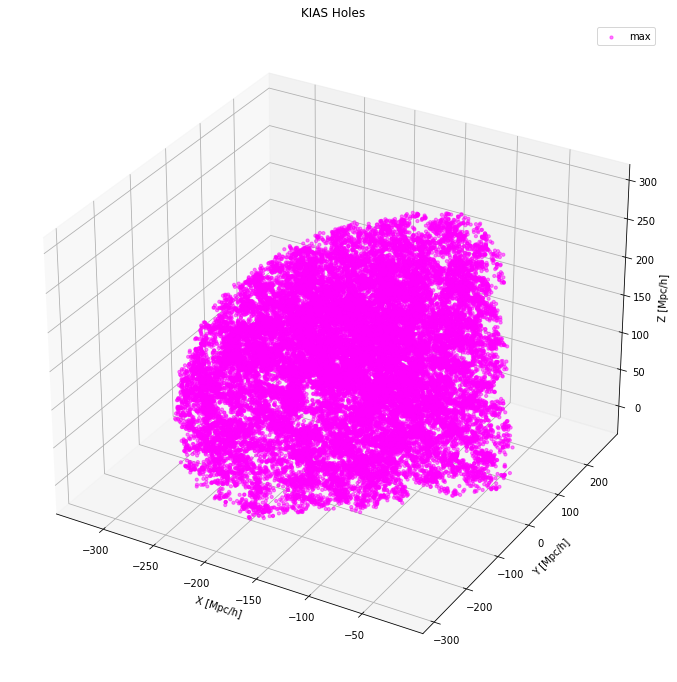

In [15]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(data_table_KIAS['x'],data_table_KIAS['y'], data_table_KIAS['z'],
           color = 'magenta', s=10, alpha=0.5,
           label='max')
ax.set(xlabel='X [Mpc/h]',
       ylabel='Y [Mpc/h]',
       zlabel='Z [Mpc/h]')

ax.legend(loc='upper right', fontsize=10)
plt.title("KIAS Holes");

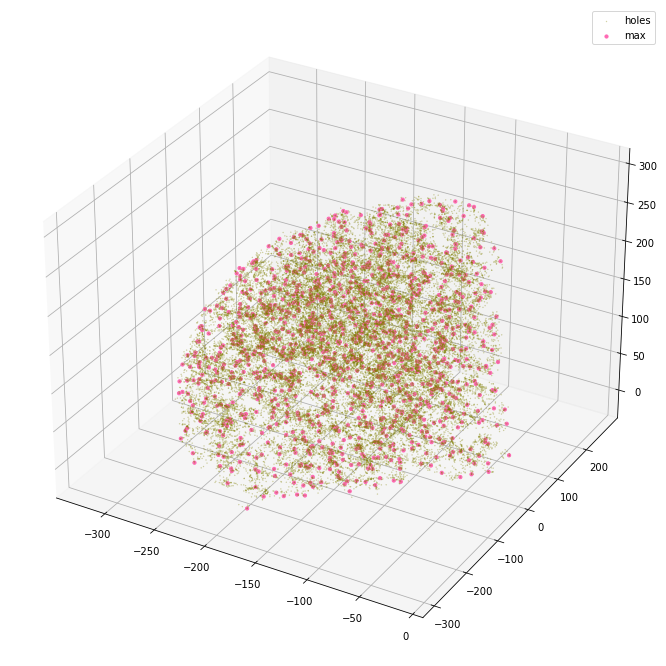

In [35]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

ax.scatter(data_table_NSA['x'],data_table_NSA['y'], data_table_NSA['z'],
           color = 'olive', s=0.1, alpha=0.5,
           label='holes')
ax.scatter(data_table_NSA_max['x'],data_table_NSA_max['y'], data_table_NSA_max['z'],
           color = 'hotpink', s=10, alpha=1.0,
           label='max')
# ax.set(xlabel='X [Mpc/h]', ylabel='Y [Mpc/h]', zlabel='Z [Mpc/h]')

ax.legend(loc='upper right', fontsize=10)

# plt.title("Maximal Sphere and Holes of NSA");

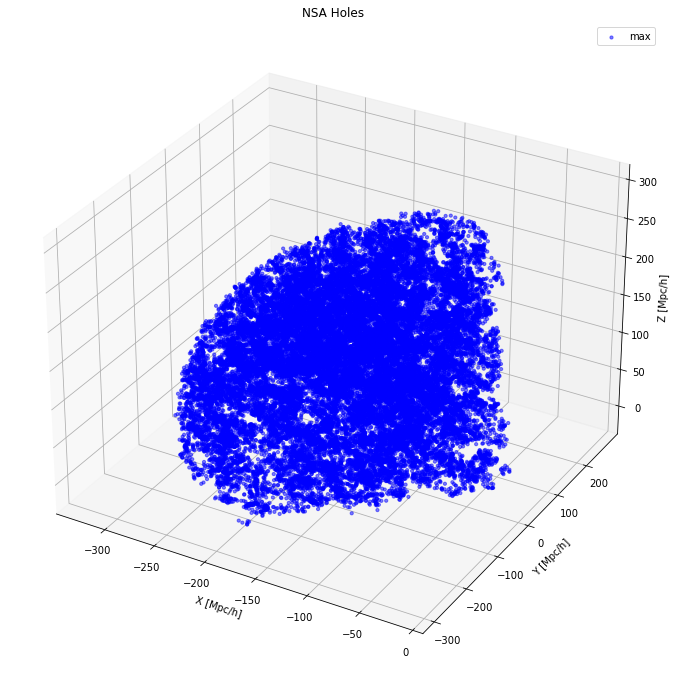

In [17]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(data_table_NSA['x'],data_table_NSA['y'], data_table_NSA['z'],
           color = 'blue', s=10, alpha=0.5,
           label='max')
ax.set(xlabel='X [Mpc/h]',
       ylabel='Y [Mpc/h]',
       zlabel='Z [Mpc/h]')

ax.legend(loc='upper right', fontsize=10)
plt.title("NSA Holes");

In [18]:
def calc_volume_boundaries(void_cat_A, void_cat_B):
    """Compute the boundaries of the minimal rectangular volume (parallelpiped)
    that completely contains two void catalogs.
    
    Parameters
    ----------
    void_cat_A : astropy.Table
        Table of void data from first catalog.
    void_cat_B : astropy.Table
        Table of void data from second catalog.
        
    Returns
    -------
    x_min : float
    x_max : float
    y_min : float
    y_max : float
    z_min : float
    z_max : float
    """
    x_min = np.minimum(np.min(void_cat_A['x']), np.min(void_cat_B['x']))
    x_max = np.maximum(np.max(void_cat_A['x']), np.max(void_cat_B['x']))
    
    y_min = np.minimum(np.min(void_cat_A['y']), np.min(void_cat_B['y']))
    y_max = np.maximum(np.max(void_cat_A['y']), np.max(void_cat_B['y']))

    z_min = np.minimum(np.min(void_cat_A['z']), np.min(void_cat_B['z']))
    z_max = np.maximum(np.max(void_cat_A['z']), np.max(void_cat_B['z']))

    return x_min, x_max, y_min, y_max, z_min, z_max

def generate_grid_points(x_min, x_max, y_min, y_max, z_min, z_max):
    """Creates a dense rectangular grid of points in 3D for the void volume calculation.
    
    Returns
    -------
    xyz : list
        2D list of points in 3D space.
    """
    x_range = np.arange(x_min, x_max)
    y_range = np.arange(y_min, y_max)
    z_range = np.arange(z_min, z_max)

    # Creating a meshgrid from the ranges to 
    X,Y,Z = np.meshgrid(x_range,y_range,z_range)

    x_points = np.ravel(X)
    y_points = np.ravel(Y)
    z_points = np.ravel(Z)
    
    point_coords = np.array([x_points, y_points, z_points])
    
    return point_coords

In [19]:
#This line creates the boundaries (like the whole min and max)
xmin, xmax, ymin, ymax, zmin, zmax = calc_volume_boundaries(data_table_KIAS, data_table_NSA)

#This line makes creates the points in between 
pts = generate_grid_points(xmin, xmax, ymin, ymax, zmin, zmax)

b = pts.shape
print(b)

(3, 55431048)


In [20]:
# This is the cell to filter out all the points that we do not want 🥴
start_time = time.time()

rmin = 0
rmax = 332.38565

points_boolean = np.ones(pts.shape[1], dtype = bool)

print(time.time() - start_time)

start_time = time.time()
for i in range(pts.shape[1]):
    
    #   print(pts[:,i].reshape((1,3)).shape)
    #   print(pts[:,i].reshape((1,3)))
    #   print(pts[:,i])
    points_boolean[i] = not_in_mask(pts[:,i].reshape((1,3)), mask, mask_resolution, rmin, rmax)        


points_in_mask = pts[:,~points_boolean]
print(time.time() - start_time)
print(points_in_mask.shape)
print(np.sum(points_boolean))
print(np.sum(~points_boolean))
print(points_boolean.shape)

0.023900985717773438
507.4298779964447
(3, 27486242)
27944806
27486242
(55431048,)


In [21]:
# should give me my good cone shape
start_time = time.time()
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.scatter(points_in_mask[0,:],points_in_mask[1,:], points_in_mask[2,:],
           color = 'blue', s=10, alpha=0.5,
           label='max')
ax.set(xlabel='X [Mpc/h]',
       ylabel='Y [Mpc/h]',
       zlabel='Z [Mpc/h]')

plt.title("Points in Mask");
print(time.time() - start_time)

4.446220874786377
Error in callback <function flush_figures at 0x7fc70854a3a0> (for post_execute):


KeyboardInterrupt: 

In [22]:
def point_query(point_coords, void_cat):
    """We are creating a function to make a KDTree to find the number of points in 
    and out of a catalogue.
    
    Parameters
    ----------
    point_coords: ndarray has a shape of (3,N)
        This is the list of points to query the given void catalogue. N is the number of points given. 
    void_cat: Astropy Table
        This is the given void catalogue.
    
    Returns
    -------
    true_inside: ndarray of shape (N,1)
        Is this the boolean array of length N (same length as point_coords). True means that 1 point 
        is inside the hole.
    """
    
    cx = void_cat['x']
    cy = void_cat['y']
    cz = void_cat['z']

    sphere_coords = np.array([cx, cy, cz])

    start_time = time.time()

    #The .T is meant to transpose the array from (3,1054) to (1054,3)
    sphere_tree = neighbors.KDTree(sphere_coords.T)

    print(time.time() - start_time)

    start_time = time.time()

    dist, idx = sphere_tree.query(point_coords.T, k = 1)

    true_inside = dist < void_cat['radius'][idx]
    
    return true_inside

In [23]:
start_time = time.time()

true_inside_KIAS = point_query(points_in_mask, data_table_KIAS)

count_in_KIAS = np.sum(true_inside_KIAS)

# The "~" inverts the array. So we have true_inside inverted to add up the falses instead of the trues
count_out_KIAS = np.sum(~true_inside_KIAS)
print(time.time() - start_time)

total_KIAS = count_in_KIAS + count_out_KIAS

true_inside_NSA = point_query(points_in_mask, data_table_NSA)

count_in_NSA = np.sum(true_inside_NSA)

# The "~" inverts the array. So we have true_inside inverted to add up the falses instead of the trues
count_out_NSA = np.sum(~true_inside_NSA)

total_NSA = count_in_NSA + count_out_NSA

print(time.time() - start_time)
print('\nNumber of points inside KIAS max: {}'.format(count_in_KIAS))
print('\nNumber of points outside KIAS max: {}'.format(count_out_KIAS))
print('\nNumber of points inside NSA max: {}'.format(count_in_NSA))
print('\nNumber of points outside NSA max: {}'.format(count_out_NSA))
print("\nThis is the total number of points KIAS: {}".format(total_KIAS))
print("\nThis is the total number of points in NSA: {}".format(total_NSA))

0.021570205688476562
55.387786865234375
0.010316133499145508
114.22049808502197

Number of points inside KIAS max: 16536228

Number of points outside KIAS max: 10950014

Number of points inside NSA max: 15633756

Number of points outside NSA max: 11852486

This is the total number of points KIAS: 27486242

This is the total number of points in NSA: 27486242


## This is the number of points that are inside both A and B

In [24]:
inside_A_and_B = np.logical_and(true_inside_KIAS, true_inside_NSA)

np.sum(inside_A_and_B), count_in_KIAS, count_in_NSA

(13488151, 16536228, 15633756)

## This is the number of points that are in neither A and B


In [25]:
not_inside_A_and_B = np.logical_and(~true_inside_KIAS, ~true_inside_NSA)

np.sum(not_inside_A_and_B), count_in_KIAS, count_in_NSA

(8804409, 16536228, 15633756)

## This is the number of points that are in A but not B

In [26]:
inside_A = np.logical_and(true_inside_KIAS, ~true_inside_NSA)

np.sum(inside_A)

3048077

## This is the number of points that are not in A but are in B

In [27]:
inside_B = np.logical_and(~true_inside_KIAS, true_inside_NSA)

np.sum(inside_B)

2145605

# Fraction of points: Calculate the ratios of the given sums

- in A
- in B
- in A & B
- in neither A nor B
- {in A, not B
- {in B, not A
-   |
-   |
- \ /
- The closer they are to zero, the more similar they are

## This is the ratio of A

In [28]:
r_A = count_in_KIAS / total_KIAS
print(r_A)

0.6016183660174425


## This is the ratio of B


In [29]:
r_B = count_in_NSA / total_KIAS
print(r_B)

0.5687847760344975


## This is the ratio of A & B

In [30]:
r_AB = np.sum(inside_A_and_B) / total_KIAS
print(r_AB)

0.4907237227992099


## This is the ratio of neither A nor B


In [31]:
r_notAB = np.sum(not_inside_A_and_B) / total_KIAS
print(r_notAB)

0.3203205807472699


## This is the ratio of A and not B

In [32]:
r_A_not_B = np.sum(inside_A) / total_KIAS
print(r_A_not_B)

0.1108946432182326


## This is the ratio of B and not A


In [33]:
r_B_not_A = np.sum(inside_B) / total_KIAS
print(r_B_not_A)

0.07806105323528767


In [34]:
Sum = r_AB + r_notAB + r_A_not_B + r_B_not_A
Sum

1.0